# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [69]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [71]:
# TODO: view the shape of your data
transactions.shape

(1000000, 10)

In [72]:
# TODO: Begin your EDA
transactions.isnull().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [73]:
transactions.info

<bound method DataFrame.info of             type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0        PAYMENT      983.09  C1454812978       36730.24        35747.15   
1        PAYMENT    55215.25  C1031766358       99414.00        44198.75   
2        CASH_IN   220986.01  C1451868666     7773074.97      7994060.98   
3       TRANSFER  2357394.75   C458368123           0.00            0.00   
4       CASH_OUT    67990.14  C1098978063           0.00            0.00   
...          ...         ...          ...            ...             ...   
999995   PAYMENT    13606.07   C768838592      114122.11       100516.04   
999996   PAYMENT     9139.61  C1912748675           0.00            0.00   
999997  CASH_OUT   153650.41  C1494179549       50677.00            0.00   
999998  CASH_OUT   163810.52   C116856975           0.00            0.00   
999999  CASH_OUT    51379.41  C2103541974       45503.43            0.00   

           nameDest  oldbalanceDest  newbalanceDest  is

In [74]:
transactions.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [75]:
# dropping columns we may not need
transactions.drop(columns=['nameOrig', 'nameDest'], inplace=True)
transactions

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,36730.24,35747.15,0.00,0.00,0,0
1,PAYMENT,55215.25,99414.00,44198.75,0.00,0.00,0,0
2,CASH_IN,220986.01,7773074.97,7994060.98,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,0.00,0.00,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,0.00,0.00,625317.04,693307.19,0,0
...,...,...,...,...,...,...,...,...
999995,PAYMENT,13606.07,114122.11,100516.04,0.00,0.00,0,0
999996,PAYMENT,9139.61,0.00,0.00,0.00,0.00,0,0
999997,CASH_OUT,153650.41,50677.00,0.00,0.00,380368.36,0,0
999998,CASH_OUT,163810.52,0.00,0.00,357850.15,521660.67,0,0


In [76]:
transactions['type'].value_counts()

type
CASH_OUT    351360
PAYMENT     338573
CASH_IN     219955
TRANSFER     83695
DEBIT         6417
Name: count, dtype: int64

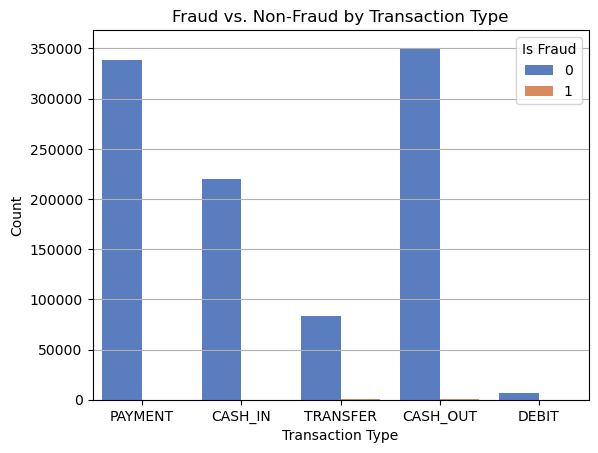

In [77]:
sns.countplot(x='type', hue='isFraud', data=transactions, palette='muted')
plt.title('Fraud vs. Non-Fraud by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.grid(axis='y')
plt.show()

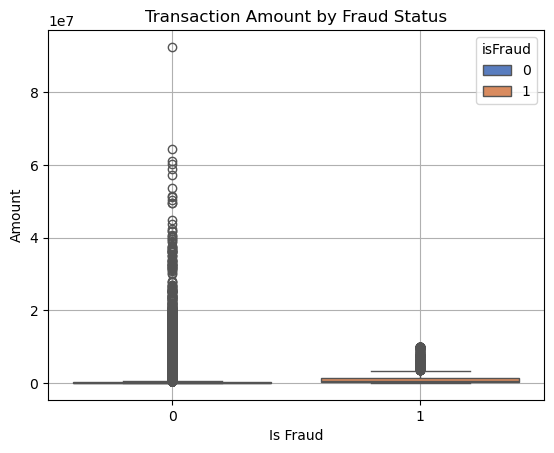

In [78]:
# how the transaction amounts differ between fraudulent and legitimate ones
sns.boxplot(x='isFraud', y='amount', hue='isFraud', data=transactions, palette='muted')
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.grid()
plt.show()

<Axes: >

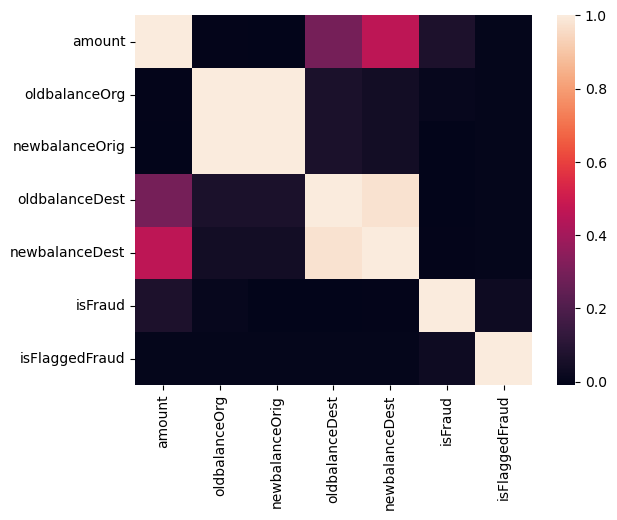

In [79]:
sns.heatmap(transactions.corr(numeric_only=True))

## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

ANSWER: Looking at the visualizations, it's obvious that very rare fraud transactions are less in amounts. Additionally, looking at the type of transactions, cashouts and transfers are the most common among fraud transactions. 

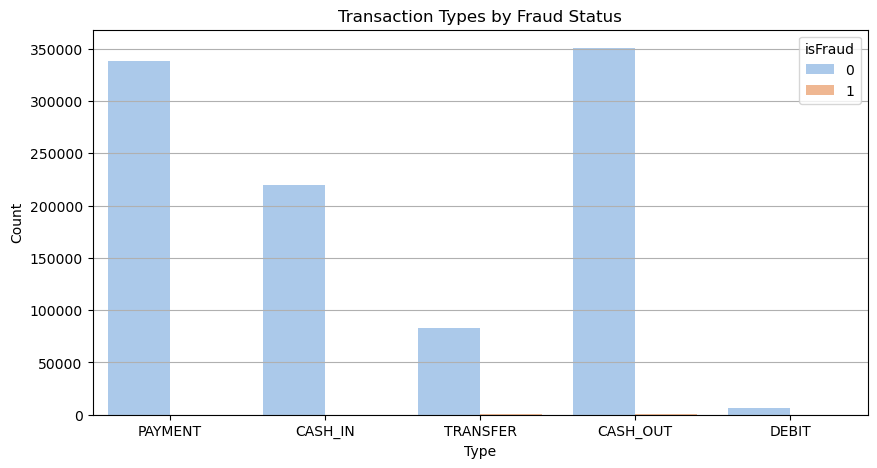

In [80]:
plt.figure(figsize=(10, 5))
sns.countplot(data=transactions, x='type', hue='isFraud', palette='pastel')
plt.title('Transaction Types by Fraud Status')
plt.xlabel('Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

ANSWER: 

Our exploratory data analysis indicates that fraudulent activity is more common during transactions involving smaller amounts of money. This trend is further supported by our breakdown of fraud cases by transaction type. Additionally, while our scatterplot highlights one exceptionally large money transfer, it does not appear to be linked to any fraudulent behavior.

In [81]:
# count the number of fraudulent transactions by type by type. as we saw before, only transfers and cashouts are fraudulent.
transactions.groupby('type')['isFraud'].value_counts()

type      isFraud
CASH_IN   0          219955
CASH_OUT  0          350703
          1             657
DEBIT     0            6417
PAYMENT   0          338573
TRANSFER  0           83055
          1             640
Name: count, dtype: int64

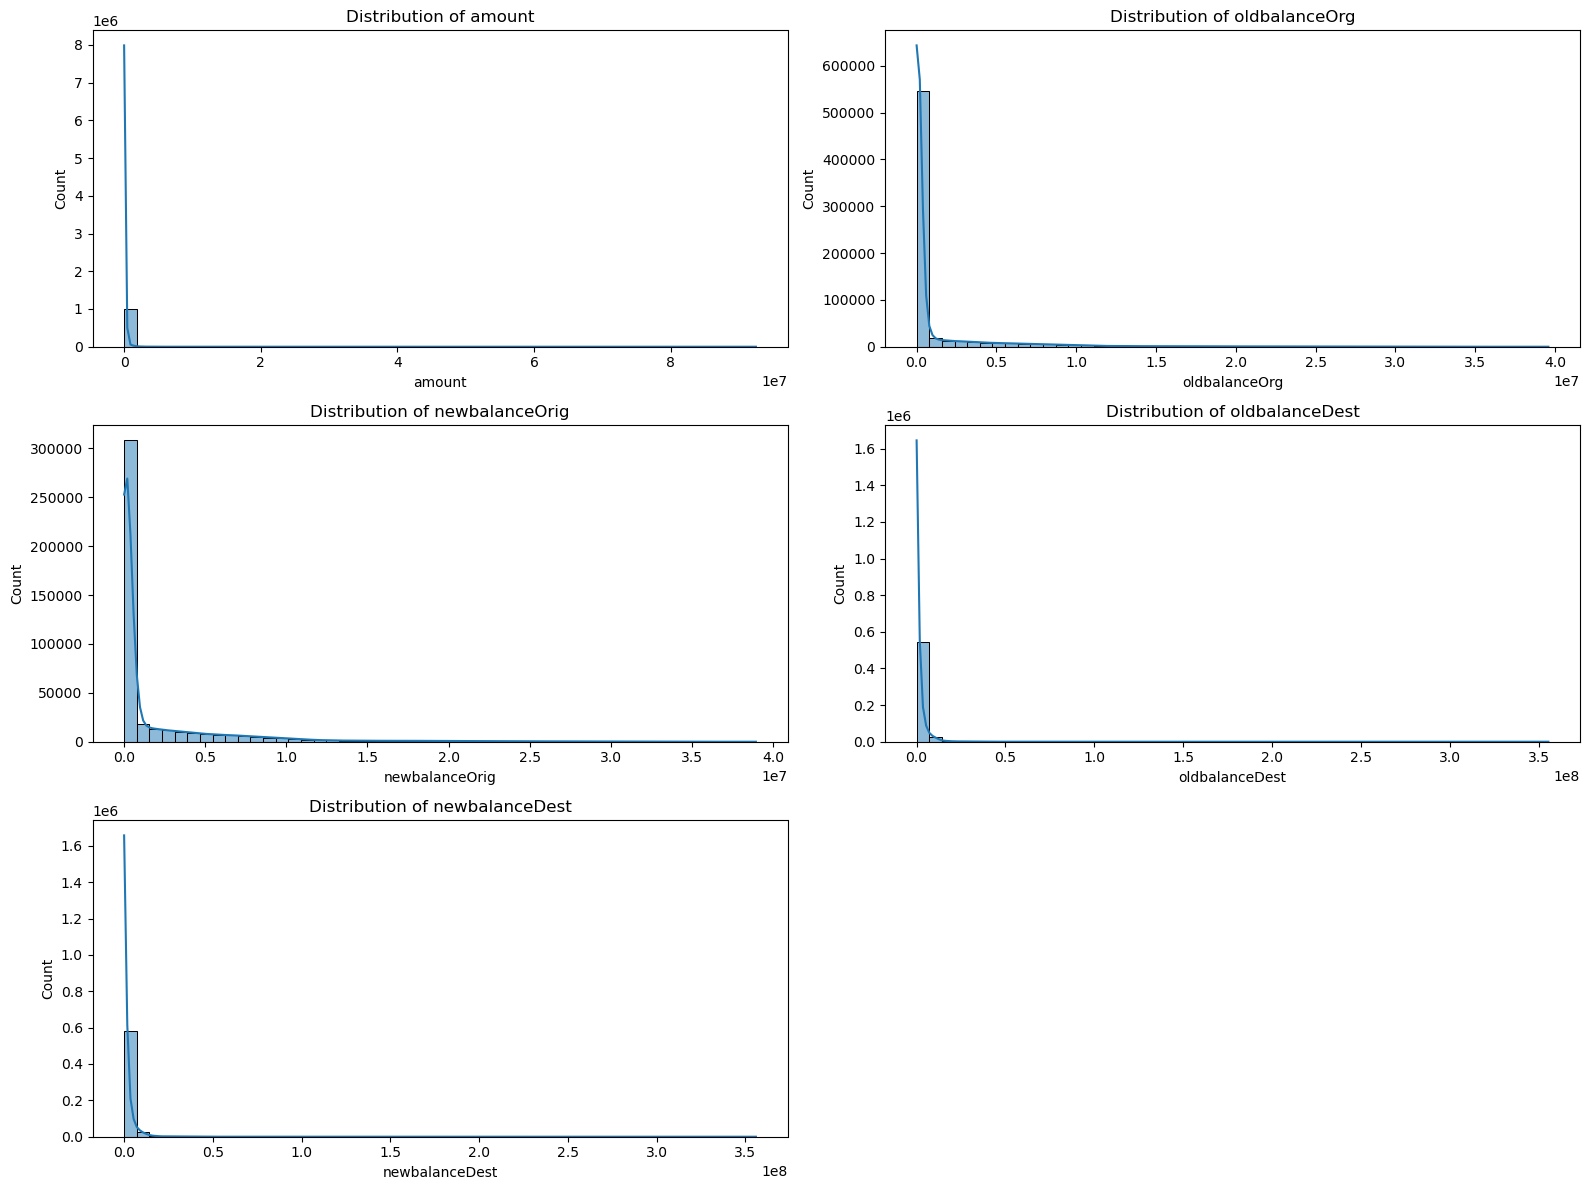

In [83]:
# 0 values may distort the scale, so we filter them out for better visualization.
# Univariate Analysis: Helps us understand normal vs. rare behavior in each feature.

numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(transactions[col][transactions[col] > 0], bins=50, kde=True)  
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

Transaction types show clear differences in the typical amounts involved. Transfers consistently involve the highest amounts showing them as having the highest mean and median values 487,883.71.

Cash_in and Cash_out transactions follow, with average amounts around 168,928 and 175,584.

In contrast, Payment and Debit transactions tend to involve significantly smaller sums, with much lower average and median values, indicating these types are typically used for lower-value activities.

In [84]:
sum_statistics = transactions.groupby('type').agg({
    'amount': ['mean', 'median', 'std', 'min', 'max']})
print("\nSummary statistics for all transaction types:")
sum_statistics


Summary statistics for all transaction types:


amount                                             
                   mean      median           std   min          max
type                                                                
CASH_IN   168928.914668  142942.990  1.267864e+05  0.43   1609288.13
CASH_OUT  175584.659320  146209.915  1.703743e+05  0.00  10000000.00
DEBIT       5445.890813    3099.530  1.302416e+04  5.24    389762.68
PAYMENT    13055.592085    9481.670  1.256291e+04  0.03    230549.18
TRANSFER  911827.155179  487883.710  1.896175e+06  2.60  92445516.64

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Answer here

Transfer and Cash-Out are the only transaction types linked to fraud, and they involve the largest amounts:
- Fraudulent Transfers average 1.38 million
- Fraudulent Cash-Outs average 1.33 million

Non-fraudulent versions of these types involve much smaller amounts:
- Non-fraud Transfers average 908k
- Non-fraud Cash-Outs average 173k

Other types—Payment, Debit, and Cash-In—show no fraud and have much lower average amounts:
- Debit: ~5.4k
- Payment: ~13k
- Cash-In: ~169k

In [85]:
grouped = transactions.groupby(['type', 'isFraud'])['amount'].agg(['count', 'mean', 'median', 'std']).reset_index()

# Rename columns for clarity
grouped.columns = ['Transaction_Type', 'Is_Fraud', 'Count', 'Average_Amount', 'Median_Amount', 'StdDev_Amount']

# Display the summary
print(grouped)

  Transaction_Type  Is_Fraud   Count  Average_Amount  Median_Amount  \
0          CASH_IN         0  219955    1.689289e+05      142942.99   
1         CASH_OUT         0  350703    1.734277e+05      146085.00   
2         CASH_OUT         1     657    1.326971e+06      374178.28   
3            DEBIT         0    6417    5.445891e+03        3099.53   
4          PAYMENT         0  338573    1.305559e+04        9481.67   
5         TRANSFER         0   83055    9.081874e+05      488022.88   
6         TRANSFER         1     640    1.384176e+06      454774.80   

   StdDev_Amount  
0   1.267864e+05  
1   1.310352e+05  
2   2.244505e+06  
3   1.302416e+04  
4   1.256291e+04  
5   1.892640e+06  
6   2.262100e+06  


## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

Answer here

The fraud flag system is mostly good at not flagging normal transactions — almost all legitimate transactions are left alone.
But it misses almost all real frauds — only 1 fraudulent transaction was flagged, while 1,296 frauds were not caught.
So, the system is not very good at finding fraud right now. It needs improvement to catch more fraudulent activity.

In [86]:
# Group by actual fraud and system flag
summary = transactions.groupby(['isFraud', 'isFlaggedFraud']).size().reset_index(name='Count')
print(summary)

   isFraud  isFlaggedFraud   Count
0        0               0  998703
1        1               0    1296
2        1               1       1
